In [2]:
import pandas as pd    # jeżeli docelowo chcesz umieścić dane w ramce
import requests
from bs4 import BeautifulSoup   # ważna alternatywa: Selenium

In [3]:
plik = "List.csv"

In [4]:

data = pd.read_csv(plik)

In [5]:
data.shape

(50, 8)

In [6]:
data.sample

<bound method NDFrame.sample of     Unnamed: 0                     City      Population     Area (km²)  \
0            0                     Malé      153,904[1]       1.956[1]   
1            1                   Manila    1,660,714[2]       38.55[3]   
2            2                    Bogor      866,034[4]       21.56[5]   
3            3                 Titagarh      124,213[6]        3.24[7]   
4            4                Baranagar      250,768[6]        7.12[7]   
5            5                Serampore      197,857[6]        5.88[7]   
6            6             South Dumdum      392,444[6]       13.54[7]   
7            7                Kamarhati      314,507[6]       10.96[7]   
8            8                  Kolkata    5,138,208[8]         185[9]   
9            9         Levallois-Perret      66,082[10]       2.41[10]   
10          10              Mandaluyong      305,576[2]       11.26[3]   
11          11                  Neapoli      30,279[11]       1.17[11]   
12    

In [7]:
data.sample(5)

,Unnamed: 0,City,Population,Area (km²),Area (mi²),Density (/km²),Density (/mi²),Country
47,47,Dafni,"23,674[17]",1.38[17],0.53,17155,44431.0,Greece
36,36,Athens,"745,514[17]",38.96[17],15.04,19135,49560.0,Greece
38,38,Naihati,"215,303[6]",11.55[7],4.46,18641,48280.0,India
44,44,Sylhet,"463,198[22]",26.5[28],10.23,17479,45278.0,Bangladesh
10,10,Mandaluyong,"305,576[2]",11.26[3],4.35,27138,70288.0,Philippines


In [8]:
data.columns

Index(['Unnamed: 0', 'City', 'Population', 'Area (km²)', 'Area (mi²)',
       'Density (/km²)', 'Density (/mi²)', 'Country'],
      dtype='object')

In [9]:
data.drop(columns=['Unnamed: 0'], inplace=True)
data.columns

Index(['City', 'Population', 'Area (km²)', 'Area (mi²)', 'Density (/km²)',
       'Density (/mi²)', 'Country'],
      dtype='object')

In [10]:
# test1
"[ad]".strip("[]")

'ad'

In [11]:
#test 2
"bgd[ad]".strip("[]")

'bgd[ad'

In [12]:
#test 3
"bgd[ad]".split("[")[0]

'bgd'

In [13]:
#test 4
df = data.__deepcopy__()
df

,City,Population,Area (km²),Area (mi²),Density (/km²),Density (/mi²),Country
0,Malé,"153,904[1]",1.956[1],0.755,78683,203846.00,Maldives
1,Manila,"1,660,714[2]",38.55[3],14.88,43079,111576.00,Philippines
2,Bogor,"866,034[4]",21.56[5],8.32,40169,104037.00,Indonesia
3,Titagarh,"124,213[6]",3.24[7],1.25,38337,99293.00,India
4,Baranagar,"250,768[6]",7.12[7],2.75,35220,91220.00,India
5,Serampore,"197,857[6]",5.88[7],2.27,33649,87151.00,India
6,South Dumdum,"392,444[6]",13.54[7],5.23,28984,75069.00,India
7,Kamarhati,"314,507[6]",10.96[7],4.23,28696,74323.00,India
8,Kolkata,"5,138,208[8]",185[9],71.4,27774,71935.00,India
9,Levallois-Perret,"66,082[10]",2.41[10],0.93,27420,71017.00,France


In [14]:
df["Population"] = [num.split("[")[0] for num in df["Population"]]

In [15]:
df

,City,Population,Area (km²),Area (mi²),Density (/km²),Density (/mi²),Country
0,Malé,"153,904",1.956[1],0.755,78683,203846.00,Maldives
1,Manila,"1,660,714",38.55[3],14.88,43079,111576.00,Philippines
2,Bogor,"866,034",21.56[5],8.32,40169,104037.00,Indonesia
3,Titagarh,"124,213",3.24[7],1.25,38337,99293.00,India
4,Baranagar,"250,768",7.12[7],2.75,35220,91220.00,India
5,Serampore,"197,857",5.88[7],2.27,33649,87151.00,India
6,South Dumdum,"392,444",13.54[7],5.23,28984,75069.00,India
7,Kamarhati,"314,507",10.96[7],4.23,28696,74323.00,India
8,Kolkata,"5,138,208",185[9],71.4,27774,71935.00,India
9,Levallois-Perret,"66,082",2.41[10],0.93,27420,71017.00,France


In [16]:
df["Area (km²)"] = [num.split("[")[0] for num in df["Area (km²)"]]

In [17]:
df

,City,Population,Area (km²),Area (mi²),Density (/km²),Density (/mi²),Country
0,Malé,"153,904",1.956,0.755,78683,203846.00,Maldives
1,Manila,"1,660,714",38.55,14.88,43079,111576.00,Philippines
2,Bogor,"866,034",21.56,8.32,40169,104037.00,Indonesia
3,Titagarh,"124,213",3.24,1.25,38337,99293.00,India
4,Baranagar,"250,768",7.12,2.75,35220,91220.00,India
5,Serampore,"197,857",5.88,2.27,33649,87151.00,India
6,South Dumdum,"392,444",13.54,5.23,28984,75069.00,India
7,Kamarhati,"314,507",10.96,4.23,28696,74323.00,India
8,Kolkata,"5,138,208",185,71.4,27774,71935.00,India
9,Levallois-Perret,"66,082",2.41,0.93,27420,71017.00,France


In [18]:

df["Area (mi²)"] = [num.split("[")[0] for num in df["Area (mi²)"]]
df

,City,Population,Area (km²),Area (mi²),Density (/km²),Density (/mi²),Country
0,Malé,"153,904",1.956,0.755,78683,203846.00,Maldives
1,Manila,"1,660,714",38.55,14.88,43079,111576.00,Philippines
2,Bogor,"866,034",21.56,8.32,40169,104037.00,Indonesia
3,Titagarh,"124,213",3.24,1.25,38337,99293.00,India
4,Baranagar,"250,768",7.12,2.75,35220,91220.00,India
5,Serampore,"197,857",5.88,2.27,33649,87151.00,India
6,South Dumdum,"392,444",13.54,5.23,28984,75069.00,India
7,Kamarhati,"314,507",10.96,4.23,28696,74323.00,India
8,Kolkata,"5,138,208",185,71.4,27774,71935.00,India
9,Levallois-Perret,"66,082",2.41,0.93,27420,71017.00,France


In [19]:
import matplotlib.pyplot as plt

<Axes: >

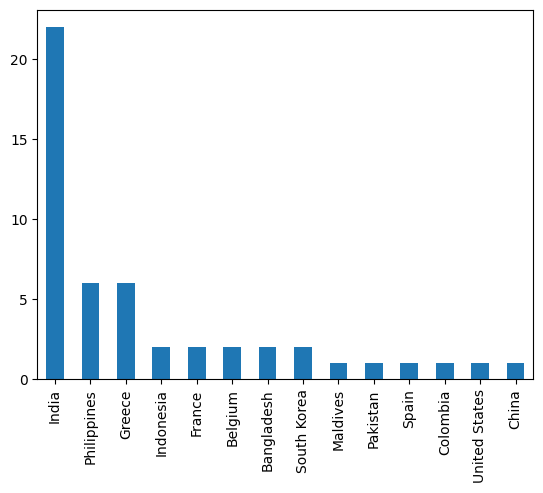

In [20]:
#test 5
df["Country"].value_counts().plot(kind="bar")

In [21]:
df_India = df[df["Country"]=="India"].__deepcopy__()
df_India

,City,Population,Area (km²),Area (mi²),Density (/km²),Density (/mi²),Country
3,Titagarh,"124,213",3.24,1.25,38337,99293.0,India
4,Baranagar,"250,768",7.12,2.75,35220,91220.0,India
5,Serampore,"197,857",5.88,2.27,33649,87151.0,India
6,South Dumdum,"392,444",13.54,5.23,28984,75069.0,India
7,Kamarhati,"314,507",10.96,4.23,28696,74323.0,India
8,Kolkata,"5,138,208",185,71.4,27774,71935.0,India
14,Chennai,"4,616,639",181.04,69.9,25501,66047.0,India
16,Hyderabad,"4,068,611",172.70,66.68,23559,61017.0,India
20,Mumbai,"13,830,884",603.0,232.8,22937,59406.0,India
21,Jaigaon,"38,689",1.69,0.65,22893,59293.0,India


In [22]:
df_India["Population"] = [int(num.replace(',', '')) for num in df_India["Population"]]
df_India = df_India.sort_values(by=["Population"])
df_India


,City,Population,Area (km²),Area (mi²),Density (/km²),Density (/mi²),Country
24,Banupur,11647,0.52,0.20,22398,58011.0,India
21,Jaigaon,38689,1.69,0.65,22893,59293.0,India
43,Rishra,113305,6.48,2.50,17485,45286.0,India
48,Khardaha,116470,6.87,2.65,16953,43908.0,India
3,Titagarh,124213,3.24,1.25,38337,99293.0,India
26,Balurghat,135737,6.37,2.46,21309,55190.0,India
5,Serampore,197857,5.88,2.27,33649,87151.0,India
38,Naihati,215303,11.55,4.46,18641,48280.0,India
4,Baranagar,250768,7.12,2.75,35220,91220.0,India
25,Bally,260906,11.81,4.56,22092,57218.0,India


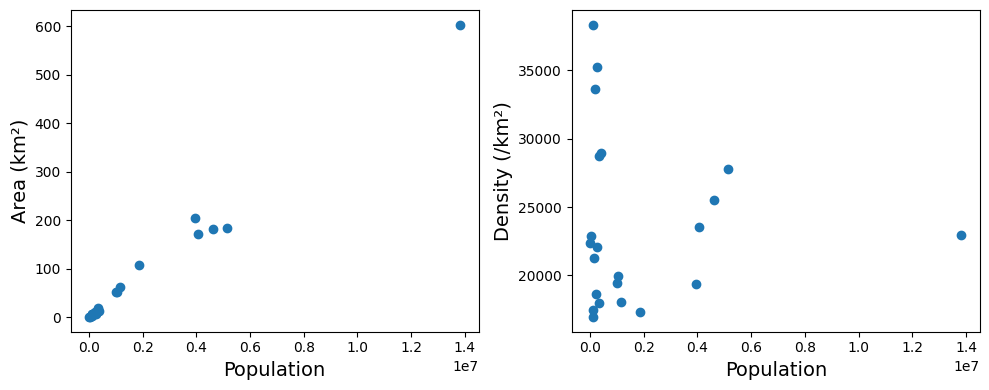

In [45]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

df_India["Area (km²)"] = [float(num) for num in df_India["Area (km²)"]]

pop = df_India["Population"]
ar = df_India["Area (km²)"]
dens = df_India["Density (/km²)"]
ax[0].scatter(x=pop, y=ar)
ax[0].set_xlabel('Population', fontsize=14)
ax[0].set_ylabel('Area (km²)', fontsize=14)

ax[1].scatter(x=pop, y=dens)
ax[1].set_xlabel('Population', fontsize=14)
ax[1].set_ylabel('Density (/km²)', fontsize=14)
#ax[1].legend()

fig.tight_layout()
plt.show()

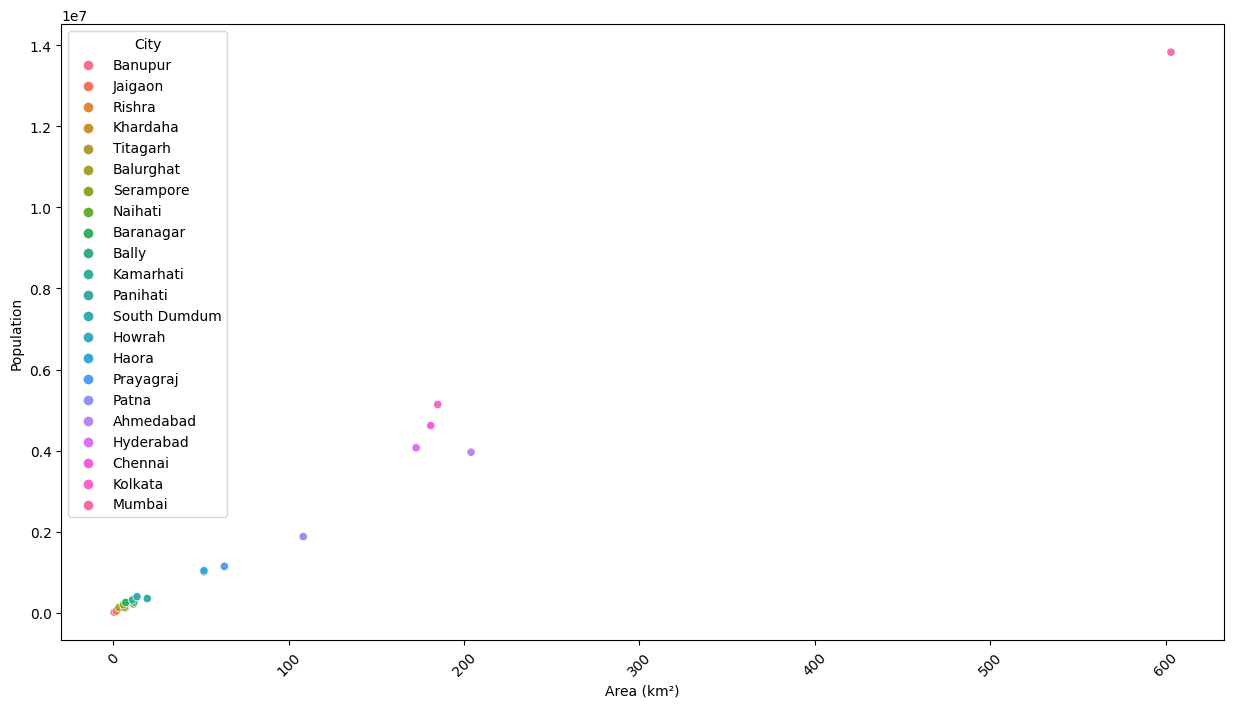

In [46]:
import seaborn as sns
plt.figure(figsize=(15,8))
sns.scatterplot(x=df_India['Area (km²)'], y=df_India['Population'], hue=df_India['City'])
plt.xticks(rotation=45)
plt.show()

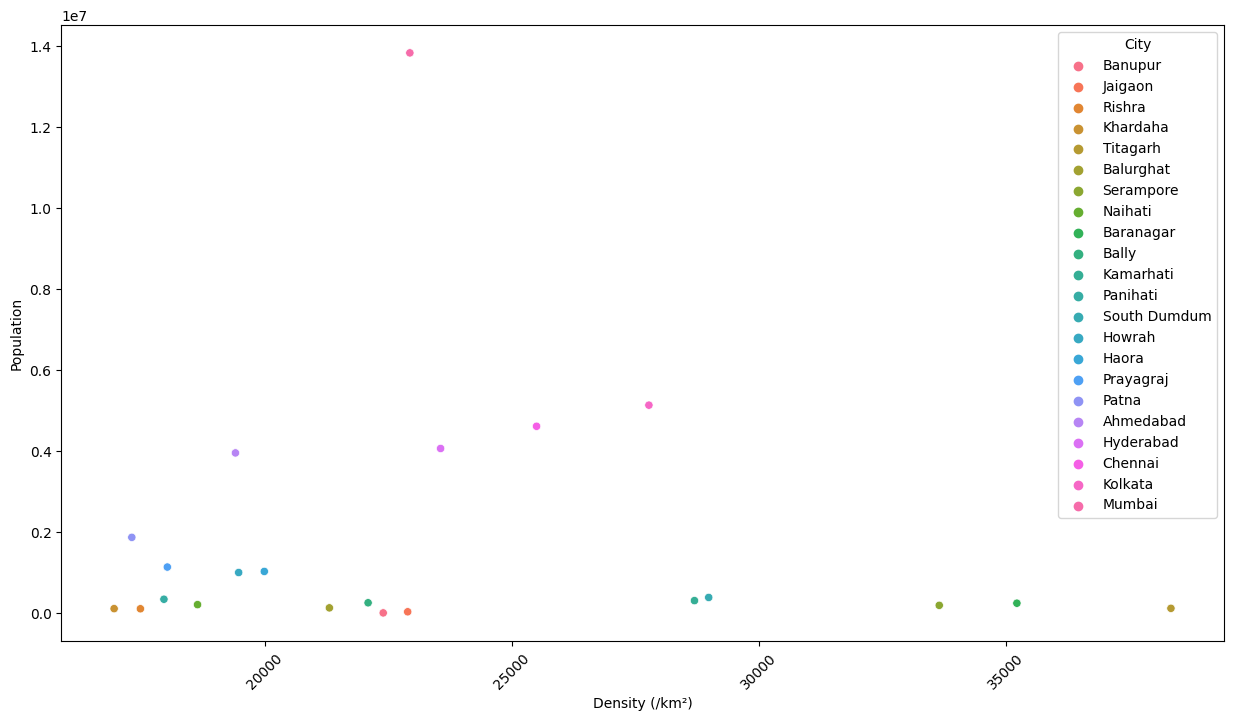

In [48]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=df_India["Density (/km²)"], y=df_India['Population'], hue=df_India['City'])
plt.xticks(rotation=45)
plt.show()

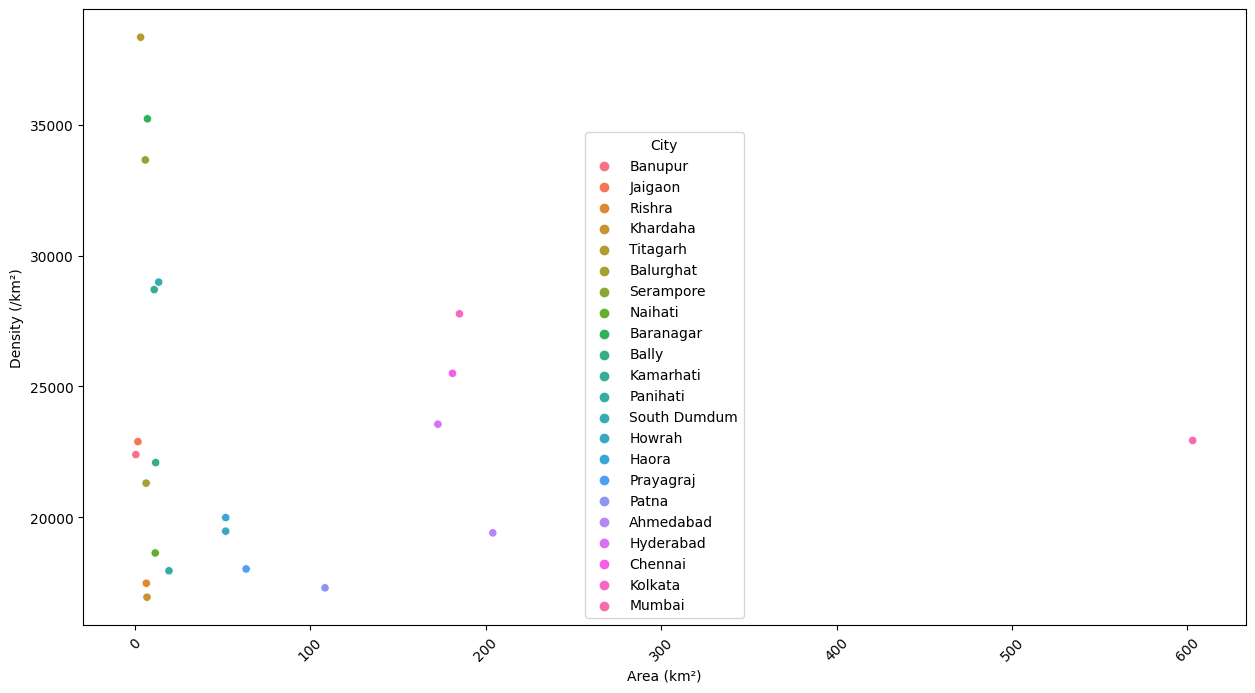

In [49]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=df_India['Area (km²)'], y=df_India["Density (/km²)"], hue=df_India['City'])
plt.xticks(rotation=45)
plt.show()

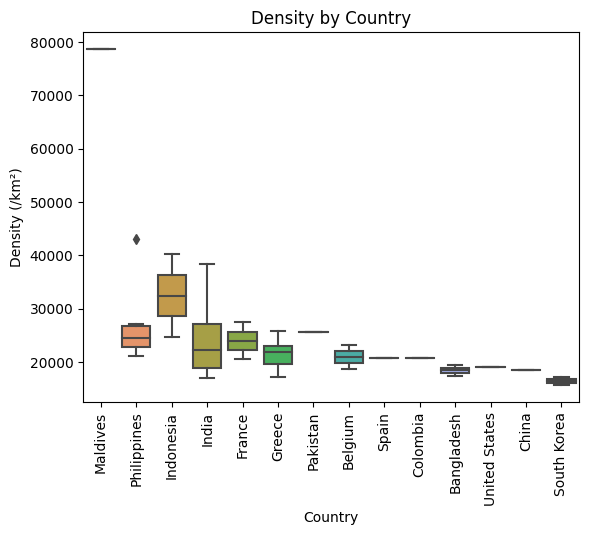

In [27]:
sns.boxplot(data=df, x='Country', y='Density (/km²)')
plt.xticks(rotation=90)
plt.title('Density by Country')
plt.show()

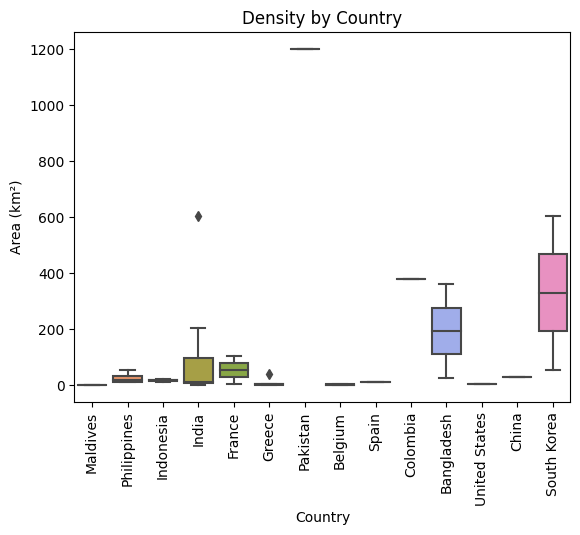

In [28]:
df["Area (km²)"] = [float(num) for num in df["Area (km²)"]]
sns.boxplot(data=df, x='Country', y='Area (km²)')
plt.xticks(rotation=90)
plt.title('Density by Country')
plt.show()

In [29]:
from sklearn.linear_model import LinearRegression
import numpy as np


In [50]:
model_lin = LinearRegression()
X_adj = pop.values
Y_adj = ar.values
print(X_adj, Y_adj)

[   11647    38689   113305   116470   124213   135737   197857   215303
   250768   260906   314507   348438   392444  1007532  1034372  1142722
  1875572  3959432  4068611  4616639  5138208 13830884] [5.2000e-01 1.6900e+00 6.4800e+00 6.8700e+00 3.2400e+00 6.3700e+00
 5.8800e+00 1.1550e+01 7.1200e+00 1.1810e+01 1.0960e+01 1.9400e+01
 1.3540e+01 5.1740e+01 5.1740e+01 6.3380e+01 1.0834e+02 2.0400e+02
 1.7270e+02 1.8104e+02 1.8500e+02 6.0300e+02]


In [51]:
model_lin.fit(X_adj.reshape(-1,1), Y_adj)

LinearRegression()

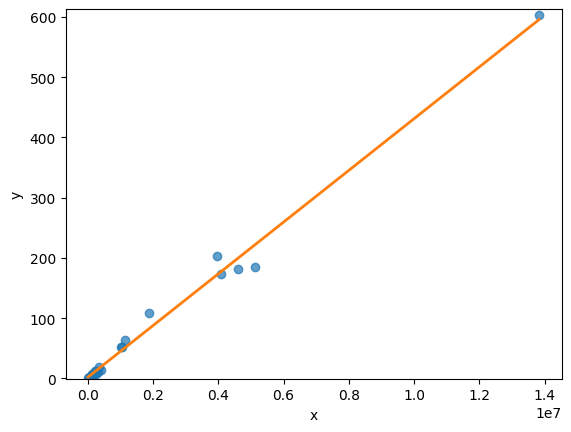

In [52]:
X_test = np.linspace(start=X_adj.min(), stop=X_adj.max())
Y_pred = model_lin.predict(X_test.reshape(-1,1))

plt.scatter(X_adj,Y_adj, alpha=0.7)
plt.plot(X_test, Y_pred, color='tab:orange', linewidth=2)
plt.ylim([Y_adj[0]-1, Y_adj[-1]+10])
plt.xlabel('x')
plt.ylabel('y')
plt.show()
#print(Y_adj[0], Y_adj[-1])

In [53]:
print(f'Parametry modelu liniowego: a = {np.round(model_lin.coef_,5)}, b = {np.round(model_lin.intercept_,5)}')

Parametry modelu liniowego: a = [4.e-05], b = 2.00529


In [54]:
print(Y_pred)

[  2.5051913   14.60997474  26.71475818  38.81954162  50.92432506
  63.0291085   75.13389193  87.23867537  99.34345881 111.44824225
 123.55302569 135.65780913 147.76259257 159.86737601 171.97215944
 184.07694288 196.18172632 208.28650976 220.3912932  232.49607664
 244.60086008 256.70564351 268.81042695 280.91521039 293.01999383
 305.12477727 317.22956071 329.33434415 341.43912758 353.54391102
 365.64869446 377.7534779  389.85826134 401.96304478 414.06782822
 426.17261166 438.27739509 450.38217853 462.48696197 474.59174541
 486.69652885 498.80131229 510.90609573 523.01087916 535.1156626
 547.22044604 559.32522948 571.43001292 583.53479636 595.6395798 ]


In [55]:
from sklearn.metrics import mean_squared_error

mean_squared_error(Y_adj, model_lin.predict(X_adj.reshape(-1,1)))

177.21622725056798

In [56]:
print(f'Parametry modelu liniowego: {np.round(model_lin.coef_,5)}, {np.round(model_lin.intercept_,5)}')

Parametry modelu liniowego: [4.e-05], 2.00529


Parametry modelu liniowego: [4.e-05], 2.00529
Błąd średniokwadratowy modelu liniowego: 1.77e+02

Parametry modelu GLM: [0. 0. 0.], 3.16836
Błąd średniokwadratowy modelu GLM: 1.74e+02

Błąd średniokwadratowy modelu SVR: 2.11e+04


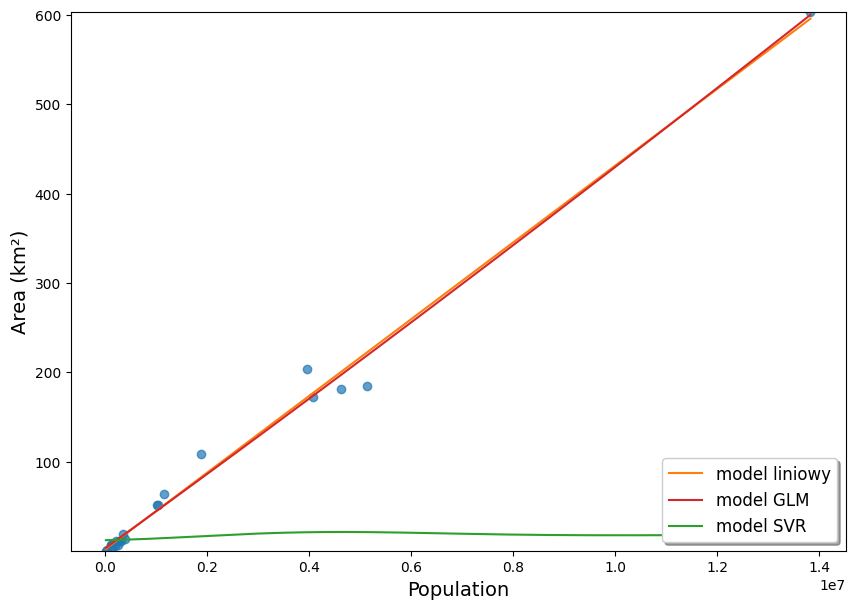

In [57]:
X = X_adj
Y = Y_adj


# =========  Model liniowy =========
from sklearn.linear_model import LinearRegression
model_lin = LinearRegression()
model_lin.fit(X.reshape(-1,1), Y)
print(f'Parametry modelu liniowego: {np.round(model_lin.coef_,5)}, {np.round(model_lin.intercept_,5)}')
MSE_lin = mean_squared_error(Y, model_lin.predict(X.reshape(-1,1)))
print(f'Błąd średniokwadratowy modelu liniowego: {MSE_lin:0.3}\n')

# ===== Uogólniony model liniowy (ang. Generalized Linear Model) =====
from sklearn.preprocessing import PolynomialFeatures
model_GLM = LinearRegression()
gen_features = PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)
model_GLM.fit(gen_features.fit_transform(X.reshape(-1,1)), Y)

print(f'Parametry modelu GLM: {np.round(model_GLM.coef_,4)}, {np.round(model_GLM.intercept_,5)}')
MSE_GLM = mean_squared_error(Y, model_GLM.predict(gen_features.fit_transform(X.reshape(-1,1))))
print(f'Błąd średniokwadratowy modelu GLM: {MSE_GLM:0.3}\n')

#==== Maszyna wektorów wspierających (ang. Support Vector Machine) ====
# SVR dla regresji, SVC dla kalsyfikacji
from sklearn.svm import SVR
model_svr = SVR(kernel='rbf', gamma='scale', C=1)
model_svr.fit(X.reshape(-1,1), Y)
MSE_SVR = mean_squared_error(Y, model_svr.predict(X.reshape(-1,1)))
print(f'Błąd średniokwadratowy modelu SVR: {MSE_SVR:0.3}')

# Predykcje wszystkich modeli dla całego zakreso osi X
os_x = np.linspace(start=X.min(), stop=X.max(), num=300)
y_lin_pred = model_lin.predict(os_x.reshape(-1,1))
y_GLM_pred = model_GLM.predict(gen_features.fit_transform(os_x.reshape(-1,1)))
y_svr_pred = model_svr.predict(os_x.reshape(-1,1))

# Wizualizacja
plt.figure(figsize=(10,7))
plt.scatter(X, Y, alpha=0.7)
plt.plot(os_x, y_lin_pred, label='model liniowy', color='tab:orange')
plt.plot(os_x, y_GLM_pred, label=f'model GLM', color='tab:red')
plt.plot(os_x, y_svr_pred, label='model SVR', color='tab:green')
plt.xlabel('Population', fontsize=14)
plt.ylabel("Area (km²)", fontsize=14)
plt.legend(fontsize=12, shadow=True, loc='lower right')
plt.ylim([Y.min()-0.1, Y.max()+0.5])
plt.show()

Parametry modelu liniowego: [4.e-05], 3.62789
Błąd średniokwadratowy modelu liniowego: 1.76e+02

Parametry modelu GLM: [ 0.      0.0001 -0.    ], -6.24685
Błąd średniokwadratowy modelu GLM: 60.4

Błąd średniokwadratowy modelu SVR: 5.86e+03


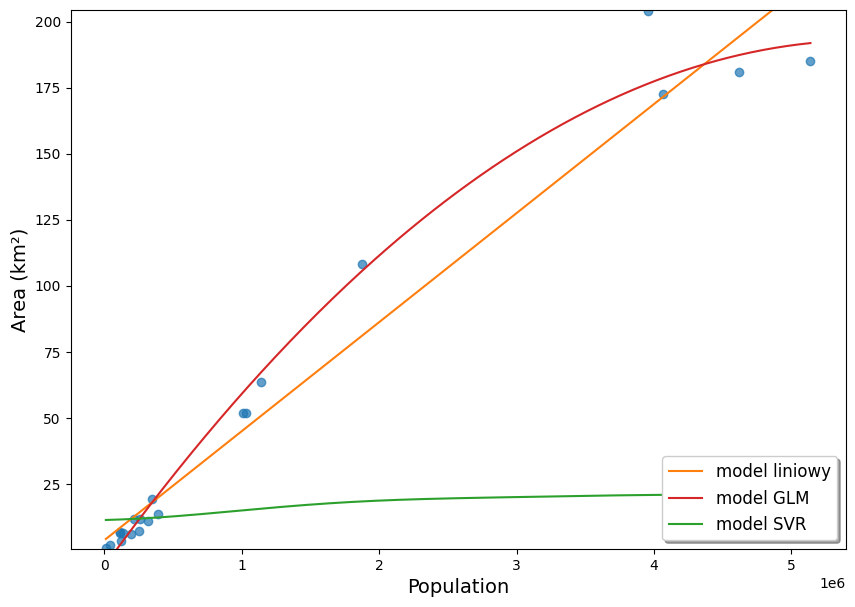

In [62]:
X = X_adj[0:-1:]
Y = Y_adj[0:-1:]


# =========  Model liniowy =========
from sklearn.linear_model import LinearRegression
model_lin = LinearRegression()
model_lin.fit(X.reshape(-1,1), Y)
print(f'Parametry modelu liniowego: {np.round(model_lin.coef_,5)}, {np.round(model_lin.intercept_,5)}')
MSE_lin = mean_squared_error(Y, model_lin.predict(X.reshape(-1,1)))
print(f'Błąd średniokwadratowy modelu liniowego: {MSE_lin:0.3}\n')

# ===== Uogólniony model liniowy (ang. Generalized Linear Model) =====
from sklearn.preprocessing import PolynomialFeatures
model_GLM = LinearRegression()
gen_features = PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)
model_GLM.fit(gen_features.fit_transform(X.reshape(-1,1)), Y)

print(f'Parametry modelu GLM: {np.round(model_GLM.coef_,4)}, {np.round(model_GLM.intercept_,5)}')
MSE_GLM = mean_squared_error(Y, model_GLM.predict(gen_features.fit_transform(X.reshape(-1,1))))
print(f'Błąd średniokwadratowy modelu GLM: {MSE_GLM:0.3}\n')

#==== Maszyna wektorów wspierających (ang. Support Vector Machine) ====
# SVR dla regresji, SVC dla kalsyfikacji
from sklearn.svm import SVR
model_svr = SVR(kernel='rbf', gamma='scale', C=1)
model_svr.fit(X.reshape(-1,1), Y)
MSE_SVR = mean_squared_error(Y, model_svr.predict(X.reshape(-1,1)))
print(f'Błąd średniokwadratowy modelu SVR: {MSE_SVR:0.3}')

# Predykcje wszystkich modeli dla całego zakreso osi X
os_x = np.linspace(start=X.min(), stop=X.max(), num=300)
y_lin_pred = model_lin.predict(os_x.reshape(-1,1))
y_GLM_pred = model_GLM.predict(gen_features.fit_transform(os_x.reshape(-1,1)))
y_svr_pred = model_svr.predict(os_x.reshape(-1,1))

# Wizualizacja
plt.figure(figsize=(10,7))
plt.scatter(X, Y, alpha=0.7)
plt.plot(os_x, y_lin_pred, label='model liniowy', color='tab:orange')
plt.plot(os_x, y_GLM_pred, label=f'model GLM', color='tab:red')
plt.plot(os_x, y_svr_pred, label='model SVR', color='tab:green')
plt.xlabel('Population', fontsize=14)
plt.ylabel("Area (km²)", fontsize=14)
plt.legend(fontsize=12, shadow=True, loc='lower right')
plt.ylim([Y.min()-0.1, Y.max()+0.5])
plt.show()

Parametry modelu liniowego: [-7.e-05], 23704.96678
Błąd średniokwadratowy modelu liniowego: 3.61e+07

Parametry modelu GLM: [ 0.     -0.0004  0.    ], 23944.31164
Błąd średniokwadratowy modelu GLM: 3.6e+07

Błąd średniokwadratowy modelu SVR: 3.79e+07


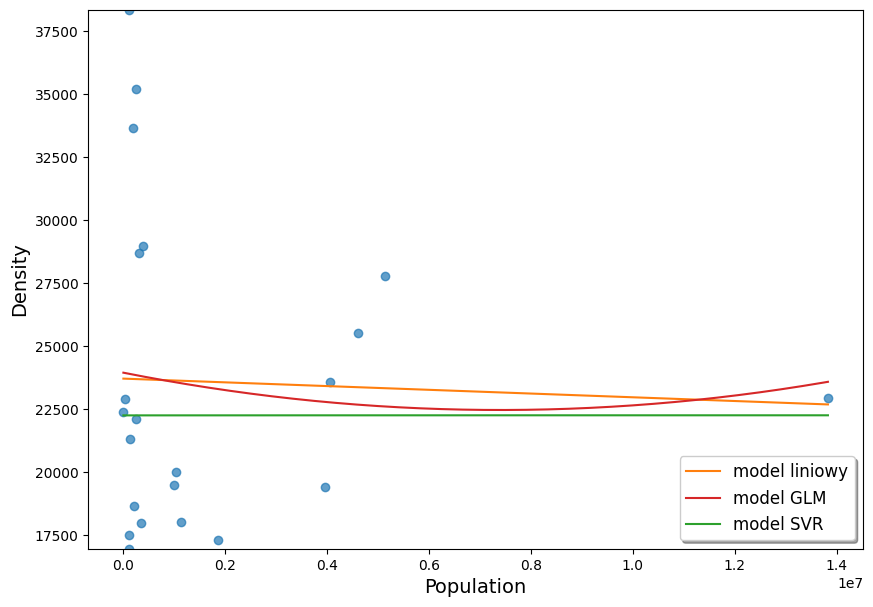

In [60]:
X = X_adj
Y = dens.values


# =========  Model liniowy =========
from sklearn.linear_model import LinearRegression
model_lin = LinearRegression()
model_lin.fit(X.reshape(-1,1), Y)
print(f'Parametry modelu liniowego: {np.round(model_lin.coef_,5)}, {np.round(model_lin.intercept_,5)}')
MSE_lin = mean_squared_error(Y, model_lin.predict(X.reshape(-1,1)))
print(f'Błąd średniokwadratowy modelu liniowego: {MSE_lin:0.3}\n')

# ===== Uogólniony model liniowy (ang. Generalized Linear Model) =====
from sklearn.preprocessing import PolynomialFeatures
model_GLM = LinearRegression()
gen_features = PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)
model_GLM.fit(gen_features.fit_transform(X.reshape(-1,1)), Y)

print(f'Parametry modelu GLM: {np.round(model_GLM.coef_,4)}, {np.round(model_GLM.intercept_,5)}')
MSE_GLM = mean_squared_error(Y, model_GLM.predict(gen_features.fit_transform(X.reshape(-1,1))))
print(f'Błąd średniokwadratowy modelu GLM: {MSE_GLM:0.3}\n')

#==== Maszyna wektorów wspierających (ang. Support Vector Machine) ====
# SVR dla regresji, SVC dla kalsyfikacji
from sklearn.svm import SVR
model_svr = SVR(kernel='rbf', gamma='scale', C=1)
model_svr.fit(X.reshape(-1,1), Y)
MSE_SVR = mean_squared_error(Y, model_svr.predict(X.reshape(-1,1)))
print(f'Błąd średniokwadratowy modelu SVR: {MSE_SVR:0.3}')

# Predykcje wszystkich modeli dla całego zakreso osi X
os_x = np.linspace(start=X.min(), stop=X.max(), num=300)
y_lin_pred = model_lin.predict(os_x.reshape(-1,1))
y_GLM_pred = model_GLM.predict(gen_features.fit_transform(os_x.reshape(-1,1)))
y_svr_pred = model_svr.predict(os_x.reshape(-1,1))

# Wizualizacja
plt.figure(figsize=(10,7))
plt.scatter(X, Y, alpha=0.7)
plt.plot(os_x, y_lin_pred, label='model liniowy', color='tab:orange')
plt.plot(os_x, y_GLM_pred, label=f'model GLM', color='tab:red')
plt.plot(os_x, y_svr_pred, label='model SVR', color='tab:green')
plt.xlabel('Population', fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.legend(fontsize=12, shadow=True, loc='lower right')
plt.ylim([Y.min()-1, Y.max()+10])
plt.show()

Parametry modelu liniowego: [-0.00013], 23761.75434
Błąd średniokwadratowy modelu liniowego: 3.78e+07

Parametry modelu GLM: [ 0.     -0.0069  0.    ], 25955.70506
Błąd średniokwadratowy modelu GLM: 3.21e+07

Błąd średniokwadratowy modelu SVR: 4.01e+07


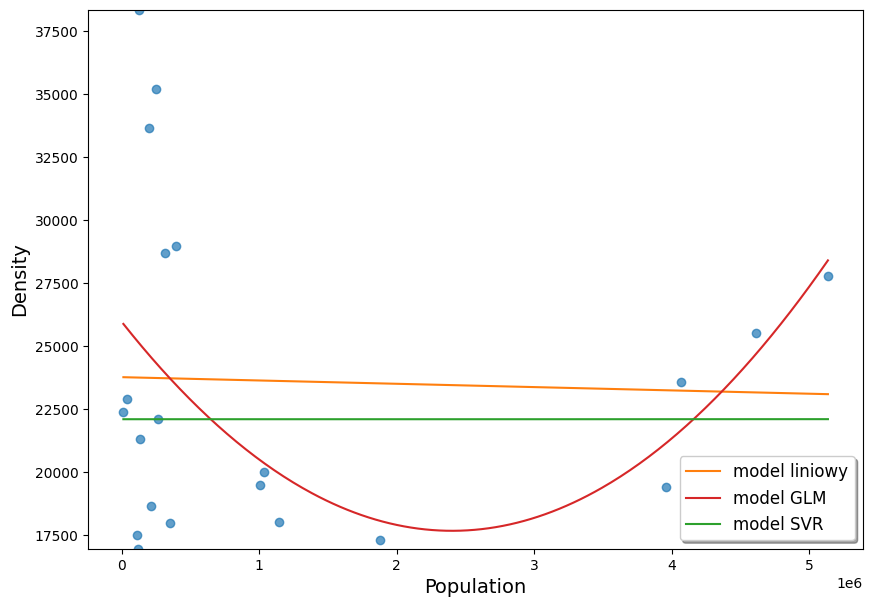

In [61]:
# teraz usuwamy anomalię (ostatnie miasto z gigantyczną powierzchnią i populacją, patrz rąb na wykresie Density by Country, Indie)
X = X_adj[0:-1:]
Y = dens.values[0:-1:]


# =========  Model liniowy =========
from sklearn.linear_model import LinearRegression
model_lin = LinearRegression()
model_lin.fit(X.reshape(-1,1), Y)
print(f'Parametry modelu liniowego: {np.round(model_lin.coef_,5)}, {np.round(model_lin.intercept_,5)}')
MSE_lin = mean_squared_error(Y, model_lin.predict(X.reshape(-1,1)))
print(f'Błąd średniokwadratowy modelu liniowego: {MSE_lin:0.3}\n')

# ===== Uogólniony model liniowy (ang. Generalized Linear Model) =====
from sklearn.preprocessing import PolynomialFeatures
model_GLM = LinearRegression()
gen_features = PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)
model_GLM.fit(gen_features.fit_transform(X.reshape(-1,1)), Y)

print(f'Parametry modelu GLM: {np.round(model_GLM.coef_,4)}, {np.round(model_GLM.intercept_,5)}')
MSE_GLM = mean_squared_error(Y, model_GLM.predict(gen_features.fit_transform(X.reshape(-1,1))))
print(f'Błąd średniokwadratowy modelu GLM: {MSE_GLM:0.3}\n')

#==== Maszyna wektorów wspierających (ang. Support Vector Machine) ====
# SVR dla regresji, SVC dla kalsyfikacji
from sklearn.svm import SVR
model_svr = SVR(kernel='rbf', gamma='scale', C=1)
model_svr.fit(X.reshape(-1,1), Y)
MSE_SVR = mean_squared_error(Y, model_svr.predict(X.reshape(-1,1)))
print(f'Błąd średniokwadratowy modelu SVR: {MSE_SVR:0.3}')

# Predykcje wszystkich modeli dla całego zakreso osi X
os_x = np.linspace(start=X.min(), stop=X.max(), num=300)
y_lin_pred = model_lin.predict(os_x.reshape(-1,1))
y_GLM_pred = model_GLM.predict(gen_features.fit_transform(os_x.reshape(-1,1)))
y_svr_pred = model_svr.predict(os_x.reshape(-1,1))

# Wizualizacja
plt.figure(figsize=(10,7))
plt.scatter(X, Y, alpha=0.7)
plt.plot(os_x, y_lin_pred, label='model liniowy', color='tab:orange')
plt.plot(os_x, y_GLM_pred, label=f'model GLM', color='tab:red')
plt.plot(os_x, y_svr_pred, label='model SVR', color='tab:green')
plt.xlabel('Population', fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.legend(fontsize=12, shadow=True, loc='lower right')
plt.ylim([Y.min()-1, Y.max()+10])
plt.show()